# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Polarimetry-with-Ecograb-polarimeter" data-toc-modified-id="Polarimetry-with-Ecograb-polarimeter-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Polarimetry with Ecograb polarimeter</a></div><div class="lev2 toc-item"><a href="#Definitions-of-variables-for-the-problem" data-toc-modified-id="Definitions-of-variables-for-the-problem-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Definitions of variables for the problem</a></div><div class="lev2 toc-item"><a href="#Definitions-of-matrices" data-toc-modified-id="Definitions-of-matrices-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Definitions of matrices</a></div>

# Polarimetry with Ecograb polarimeter
**Author** Luis Miguel Sánchez Brea

**Date** 07/06/2017

The objective of this notebook is use Jones Matrices in order to determine the intensity distribution for a polarimeter (P1, R1, S, R1, P2), where P1 and P2 are polarimeters, R1 and R2 are retarders, and S is an unknown sample
\begin{equation}
S=\left[\begin{array}{cc}
a & b\\
c & d
\end{array}\right]
\end{equation}



## Definitions of variables for the problem

For this problem, perhaps all these defintions should go in a .py module (with sympy)

In [61]:
%matplotlib inline
import sympy
from sympy import init_session
#init_session(quiet=True)
init_printing(use_latex='mathjax')
from sympy import *
import sympy

In [29]:
um=1.
wavelength=0.85*um


In [30]:
theta = sympy.symbols('\\theta', real=True, positive=True)
alpha, beta, gamma, delta = sympy.symbols('\\alpha, \\beta, \\gamma, \\delta', real=True, positive=True)
theta1, theta2, theta3, theta4 = sympy.symbols('\\theta_1, \\theta_2, \\theta_3, \\theta_4', real=True, positive=True)
p0, p1 = sympy.symbols('p_0, p_1', real=True, positive=True)
a, b, c, d = sympy.symbols('a, b, c, d', real=True, positive=True)
ac, bc, cc, dc = sympy.symbols('a_c, b_c, c_c, d_c', real=True, positive=True)

In [31]:
def rotation(theta):
    return sympy.Matrix([[cos(theta),sin(theta)],[-sin(theta),cos(theta)]])

In [32]:
rotation(alpha)

⎡cos(\alpha)   sin(\alpha)⎤
⎢                         ⎥
⎣-sin(\alpha)  cos(\alpha)⎦

In [33]:
def polarizer_linear(theta):
    PL0=sympy.Matrix([[1,0],[0,0]])
    return rotation(-theta)*PL0*rotation(theta)

In [34]:
polarizer_linear(alpha)

⎡        2                                       ⎤
⎢     cos (\alpha)        sin(\alpha)⋅cos(\alpha)⎥
⎢                                                ⎥
⎢                                 2              ⎥
⎣sin(\alpha)⋅cos(\alpha)       sin (\alpha)      ⎦

In [35]:
def polarizer_retarder(phase=pi, ne=1, no=1, d=1 * um, wavelength=0.850 * um, theta=0):
    """Retardador
	   Se puede compute de dos formas. Si phase es distinto de None, entonces es lo que manda,
	   Si phase=None, entonces se calcula el phase con el resto de cosas.
	  - phase: phase del rotador definido como 2*pi*(ne-no)*d/lambda
	  - ne: index extraordinario, no: índice ordinario, d: thickness de la lámina, wavelength: longitud de onda
	  - theta: angle de rotación
	"""
    #Definicion del retardo
    if phase == None:
        phase = 2 * pi * (ne - no) * d / wavelength

    #Definicion de la matrix del retardador
    Lretardo = sympy.Matrix([[1, 0], [0, sympy.exp(1j * phase)]], dtype=complex)

    return rotation(-theta) * Lretardo * rotation(theta)

In [36]:
def quarter_waveplate(theta=0):
    """lamina lambda/4. Muy utilizada porque pasa de luz linealmente polarizada a luz circularmente polarizada
	"""
    #Definicion de la matrix
    return polarizer_retarder(phase=pi / 2, theta=theta)

In [37]:
quarter_waveplate(theta=0)

⎡1     0    ⎤
⎢           ⎥
⎢    0.5⋅ⅈ⋅π⎥
⎣0  ℯ       ⎦

In [38]:
def half_waveplate(theta=0):
    """lamina lambda/2. Muy utilizada porque gira el estado de polarization
	"""
    #Definicion de la matrix
    return polarizer_retarder(phase=pi, theta=theta)

In [39]:
half_waveplate(theta=0)

⎡1     0    ⎤
⎢           ⎥
⎢    1.0⋅ⅈ⋅π⎥
⎣0  ℯ       ⎦

In [40]:
def linear_light(alfa=0):
    """Luz linealmente polarizada
	   - alfa, angle en el cual esta polarizada
    	"""
    #Definicion del vector de Jones
    return Matrix([[cos(alfa)], [sin(alfa)]])


In [41]:
linear_light(pi/4)

⎡√2⎤
⎢──⎥
⎢2 ⎥
⎢  ⎥
⎢√2⎥
⎢──⎥
⎣2 ⎦

In [42]:
def circular_light(kind='d'):
    """Luz circularmente polarizada
	   - kind, 'd': derecha   'i': izquierda
    	"""
    #Definicion del vector de Jones a dextrogiro o levogiro
    if kind == 'd':
        return Matrix([[1], [1j]]) / sqrt(2)
    elif kind == 'i':
        return Matrix([[1], [-1j]]) / sqrt(2)

In [43]:
circular_light('d')

⎡   √2   ⎤
⎢   ──   ⎥
⎢   2    ⎥
⎢        ⎥
⎣0.5⋅√2⋅ⅈ⎦

In [44]:
def elliptical_light(a=1, b=1, phase=0, theta=0):
    """Luz elipticamente polarizada
	   - a: amplitude de eje x
	   - b: amplitude de eje y
	   - phase: phase entre ambos ejes
	   - theta: rotation del haz respecto de eje x
    	"""
    #Definicion del vector de Jones
    M = Matrix([[a], [b * exp(1j * phase)]], dtype=complex)
    return rotation(theta) * M

In [45]:
elliptical_light(a=1, b=1, phase=pi/4, theta=pi/4)

⎡          0.25⋅ⅈ⋅π ⎤
⎢ √2   √2⋅ℯ         ⎥
⎢ ── + ──────────── ⎥
⎢ 2         2       ⎥
⎢                   ⎥
⎢           0.25⋅ⅈ⋅π⎥
⎢  √2   √2⋅ℯ        ⎥
⎢- ── + ────────────⎥
⎣  2         2      ⎦

In [46]:
def intensity(vectorPolarizacion):
    #Calculo de la intensity
    return (abs(vectorPolarizacion[0])**2 + abs(vectorPolarizacion[1])**2)


In [47]:
intensity(circular_light('d'))

1.00000000000000

## Definitions of matrices

P1, R1, S, R2, P2

In [48]:
P1 = polarizer_linear(theta1)
P1

⎡         2                                          ⎤
⎢      cos (\theta₁)        sin(\theta₁)⋅cos(\theta₁)⎥
⎢                                                    ⎥
⎢                                    2               ⎥
⎣sin(\theta₁)⋅cos(\theta₁)        sin (\theta₁)      ⎦

In [49]:
P2=simplify(quarter_waveplate(theta2))
P2

⎡     2               2               (1 - ⅈ)⋅sin(2⋅\theta₂)     ⎤
⎢ⅈ⋅sin (\theta₂) + cos (\theta₂)      ──────────────────────     ⎥
⎢                                               2                ⎥
⎢                                                                ⎥
⎢    (1 - ⅈ)⋅sin(2⋅\theta₂)          2                 2         ⎥
⎢    ──────────────────────       sin (\theta₂) + ⅈ⋅cos (\theta₂)⎥
⎣              2                                                 ⎦

In [50]:
P3= polarizer_linear(theta3)
P3

⎡         2                                          ⎤
⎢      cos (\theta₃)        sin(\theta₃)⋅cos(\theta₃)⎥
⎢                                                    ⎥
⎢                                    2               ⎥
⎣sin(\theta₃)⋅cos(\theta₃)        sin (\theta₃)      ⎦

## Simulation of experiment: perfect polarizers

In [51]:
P1= polarizer_linear(0)
P2=simplify(quarter_waveplate(theta2))
P3= polarizer_linear(pi/2)
light=circular_light('d')


In [52]:
intensity(P3*P2*P1*light)

   2           
sin (2⋅\theta₂)
───────────────
       4       

**Conclusion**:

* Experimentally we have a high minimum intensity. As a consequence polarizers are not perfect

## Simulation of experiment: perfect waveplate, imperfect linear polarizers

In [53]:
def polarizer_linear_imperfect(theta, p0, p1):
    PL0=sympy.Matrix([[p0,0],[0,p1]])
    return rotation(-theta)*PL0*rotation(theta)

In [54]:
P1= polarizer_linear_imperfect(0, p0, int(1))
P2=simplify(quarter_waveplate(theta2))
P3= polarizer_linear_imperfect(pi/2, p0, int(1))
light=circular_light('d')
intensity_1=intensity(P3*P2*P1*light)


In [55]:
from sympy.utilities.lambdify import lambdify
evalfunc = lambdify((x,y), intensity_1, modules=['numpy'])

NameError: name 'x' is not defined

In [56]:
sympy.expand_trig(intensity_1)

  4    2             2                  3    3                               3
p₀ ⋅sin (\theta₂)⋅cos (\theta₂) - 1.0⋅p₀ ⋅sin (\theta₂)⋅cos(\theta₂) - 1.0⋅p₀ 

                 3                  2    4                  2    4            
⋅sin(\theta₂)⋅cos (\theta₂) + 1.0⋅p₀ ⋅sin (\theta₂) + 1.0⋅p₀ ⋅cos (\theta₂) + 

          3                                                3                  
1.0⋅p₀⋅sin (\theta₂)⋅cos(\theta₂) + 1.0⋅p₀⋅sin(\theta₂)⋅cos (\theta₂) + 1.0⋅si

 2             2         
n (\theta₂)⋅cos (\theta₂)

In [57]:
S = Matrix([[a+I*ac, b+I*bc], [c+I*cc,d+I*dc]], dtype=complex)
S

⎡a + ⅈ⋅a_c  b + ⅈ⋅b_c⎤
⎢                    ⎥
⎣c + ⅈ⋅c_c  d + ⅈ⋅d_c⎦

In [58]:
from sympy.plotting import plot

In [59]:
plot(intensity_1, (x, (theta1, 0, 2*pi)) , (y,(p0,0,1)))

NameError: name 'x' is not defined

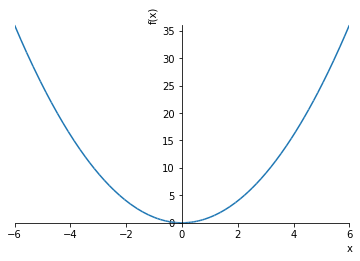

In [62]:
plot((theta1**2, (theta1, -6, 6)))